In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re
import sklearn

df1  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/labs.csv")
df2  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/examination.csv")
df3  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/demographic.csv")
df4  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/diet.csv")
df5  = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/questionnaire.csv")

#Dropping the 'SEQN' column from multiple DataFrames
df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

#Concatenating multiple DataFrames along columns
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [13]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [14]:
print(df.isnull().sum().sort_values(ascending=False))

DRQSDT5     9813
MCQ240I     9813
MCQ240R     9813
BMIHEAD     9813
SMQ690J     9813
            ... 
RIDSTATR       0
HUQ010         0
SDDSRVYR       0
DMDFMSIZ       0
SEQN           0
Length: 1812, dtype: int64


In [15]:
from sklearn.feature_selection import VarianceThreshold

#Dropping Columns and Rows with All NaNs
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

#Renaming Columns for Better Readability
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US',
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

#Selecting Specific Columns in a New Order
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum',
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.head()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557,1,NaN,0.84,13.9,35.3,20.6,55.2,2.0
1,73558,1,NaN,1.78,9.1,34.7,24.4,61.5,2.0
2,73559,1,NaN,4.51,8.9,33.5,25.6,91.0,2.0
3,73560,1,NaN,2.52,NaN,21.0,14.9,32.2,2.0
4,73561,2,NaN,5.00,4.9,25.2,NaN,30.9,2.0


In [16]:
#Handling Missing Values in Years_in_US
df['Years_in_US'] = df['Years_in_US'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

#Filling NaNs with the Median (for Numeric Columns)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breat_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df)

array([[7.3557e+04, 1.0000e+00, 8.4000e-01, ..., 3.5300e+01, 2.0600e+01,
        5.5200e+01],
       [7.3558e+04, 1.0000e+00, 1.7800e+00, ..., 3.4700e+01, 2.4400e+01,
        6.1500e+01],
       [7.3559e+04, 1.0000e+00, 4.5100e+00, ..., 3.3500e+01, 2.5600e+01,
        9.1000e+01],
       ...,
       [8.3729e+04, 1.0000e+00, 5.0000e+00, ..., 3.7000e+01, 2.4300e+01,
        4.6600e+01],
       [8.3730e+04, 2.0000e+00, 1.5300e+00, ..., 1.9000e+01, 2.0700e+01,
        2.0800e+01],
       [8.3731e+04, 2.0000e+00, 3.4600e+00, ..., 2.5000e+01, 1.7500e+01,
        3.6000e+01]])

In [17]:
print(df.isnull().sum().sort_values(ascending=False))

ID                   0
Gender               0
Years_in_US          0
Family_income        0
GlycoHemoglobin      0
ArmCircum            0
SaggitalAbdominal    0
GripStrength         0
Breast_fed           0
dtype: int64


🩸 This code categorizes individuals into three groups based on their GlycoHemoglobin (HbA1c) levels (according the American Diabetes Association (ADA) guidelines):

0 → Normal (HbA1c < 5.7%)
1 → Prediabetes (5.7% ≤ HbA1c ≤ 6.4%)
2 → Diabetes (HbA1c ≥ 6.5%)

In [18]:
#Creating a New Column Diabetes Based on GlycoHemoglobin

df.loc[df['GlycoHemoglobin'] < 5.7, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 5.7) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0,5.00,4.9,25.2,20.7,30.9,2.0,0.0


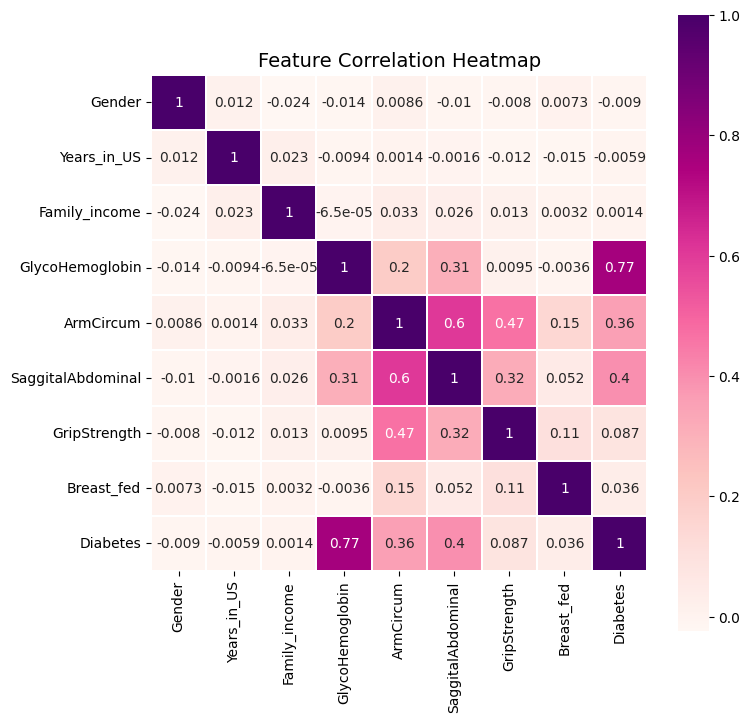

In [19]:
#Creating a correlation heatmap of numerical features in df, excluding the ID column

colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1,vmax=1.0, square=True, cmap='RdPu', annot=True)

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Let's train multiple machine learning models on a dataset to predict diabetes

In [20]:
df.drop(['GlycoHemoglobin'], axis = 1, inplace=True)

df.head(5)

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,0,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,0,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,0,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,0,5.00,25.2,20.7,30.9,2.0,0.0


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
#data -> attributes, target -> diabetes
data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

#seperate training set and test set
train_X = data[:6000]
test_X = data[6000:]
train_Y = target[:6000]
test_Y = target[6000:]

# Creating a Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_X, train_Y)
lr_score = log_reg.score(test_X, test_Y)
lr_score

0.7836349331235248

In [23]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters = 3, tol = 0.0005, algorithm="lloyd")

kms.fit_predict(train_X)

print ("parameters: ", kms.get_params)
print ("preict: ", kms.predict)
print ("\nscore: %.2f" % kms.score(test_X))

parameters:  <bound method BaseEstimator.get_params of KMeans(n_clusters=3, tol=0.0005)>
preict:  <bound method _BaseKMeans.predict of KMeans(n_clusters=3, tol=0.0005)>

score: -39595136932.74


In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#create adaboost classification obj
ab_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(train_X, train_Y)
print("training....\n")

#make prediction using the test set
ab_pred_diabetes = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_diabetes)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))

training....

prediction: 
 [0. 0. 2. ... 0. 0. 0.]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=100, random_state=100)>

mean accuracy: 0.64


In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Creating a Bagging Classifier with Decision Tree as the base estimator

bagging = BaggingClassifier(estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5,
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_dt_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.7658012063991607

In [27]:
# Creating a Bagging Classifier with K-Neighbors as the base estimator

bagging = BaggingClassifier(estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5,
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.7833726724364017

In [28]:
# Creating a MLP Classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), solver='adam', early_stopping=True, validation_fraction=0.2)

mlp.fit(train_X, train_Y)
mlp_pred_diabetes = mlp.predict(test_X)

print("parameter: ", mlp.get_params())

mlp_score = mlp.score(test_X, test_Y)
mlp.score(test_X, test_Y)

parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.2, 'verbose': False, 'warm_start': False}


0.7844217151848938

In [29]:
# to print table of the scores
d = {'Model': ['Logical Regression', 'Adaboost', 'Bagging_decision tree based', 'Bagging_KNeighbors', 'MLP'],
     'accuracy' : [lr_score, ab_clf_score, bg_dt_score, bg_score, mlp_score]}

result_df = pd.DataFrame(data = d)
result_df

,Model,accuracy
0,Logical Regression,0.783635
1,Adaboost,0.644899
2,Bagging_decision tree based,0.765801
3,Bagging_KNeighbors,0.783373
4,MLP,0.784422


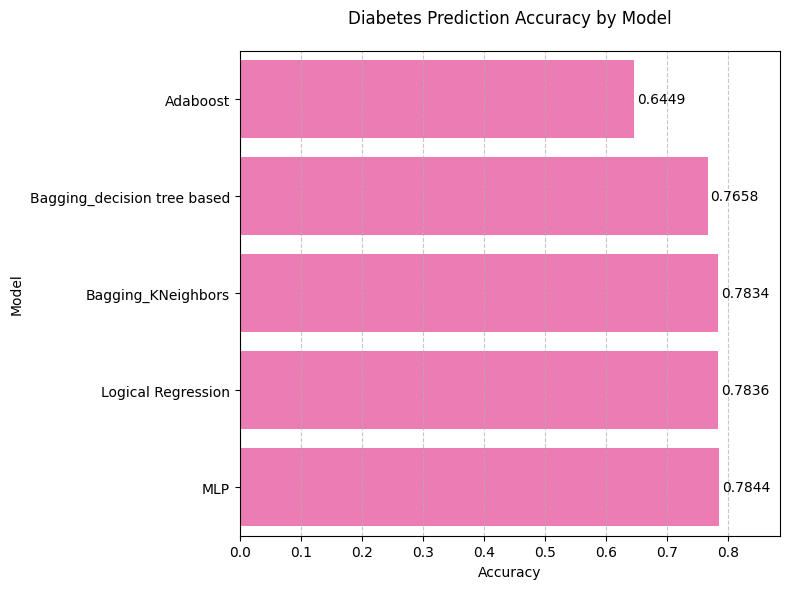

In [30]:
# Sort the dataframe by accuracy in ascending order
sorted_df = result_df.sort_values(by='accuracy')

# Create a figure
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='accuracy', y='Model', data=sorted_df, color='hotpink')

# Add value labels to the end of each bar
for i, v in enumerate(sorted_df['accuracy']):
    ax.text(v + 0.005, i, f"{v:.4f}", va='center')

# Customize the plot
plt.title('Diabetes Prediction Accuracy by Model', fontsize=12, pad=20)
plt.xlabel('Accuracy', fontsize=10)
plt.ylabel('Model', fontsize=10)
plt.xlim(0, max(sorted_df['accuracy']) + 0.1)  # Add some padding on the right
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()